In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder()


In [2]:
df = pd.read_csv('weather_classification_data.csv')
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


1. Temperature (Температура) - значение температуры воздуха, скорее всего в градусах Цельсия или Фаренгейта.

2. Humidity (Влажность) - относительная влажность воздуха, выраженная в процентах.

3. Wind Speed (Скорость ветра) - скорость ветра, измеряемая в метрах в секунду или километрах в час.

4. Precipitation (%) (Осадки в %) - процент вероятности осадков в данном регионе за определённый период времени.

5. Cloud Cover (Облачность) - процент облачного покрова в небе.

6. Atmospheric Pressure (Атмосферное давление) - атмосферное давление, обычно выраженное в миллибарах или миллиметрах ртутного столба.

7. UV Index (Индекс УФ-излучения) - показатель уровня ультрафиолетового излучения, который может влиять на здоровье, особенно на кожу.

8. Season (Сезон) - время года, которое может быть представлено, например, как "зима", "весна", "лето" и "осень".

9. Visibility (km) (Видимость) - расстояние, на котором можно различить объект, измеряемое в километрах.

10. Location (Местоположение) - географическая информация о месте, где были собраны данные. Это может быть название города, региона или координаты.

11. Weather Type (Тип погоды) - категория погоды, описывающая текущие условия, такие как "солнечно", "дождливо", "облачно" и т. д.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [7]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [11]:
df["UV Index"].value_counts().sort_index()

UV Index
0     2097
1     2837
2     1465
3     1432
4      831
5      591
6      524
7      543
8      532
9      572
10     577
11     582
12     218
13     189
14     210
Name: count, dtype: int64

In [64]:
df['Cloud Cover'].value_counts()

Cloud Cover
2    6090
3    4560
0    2139
1     411
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

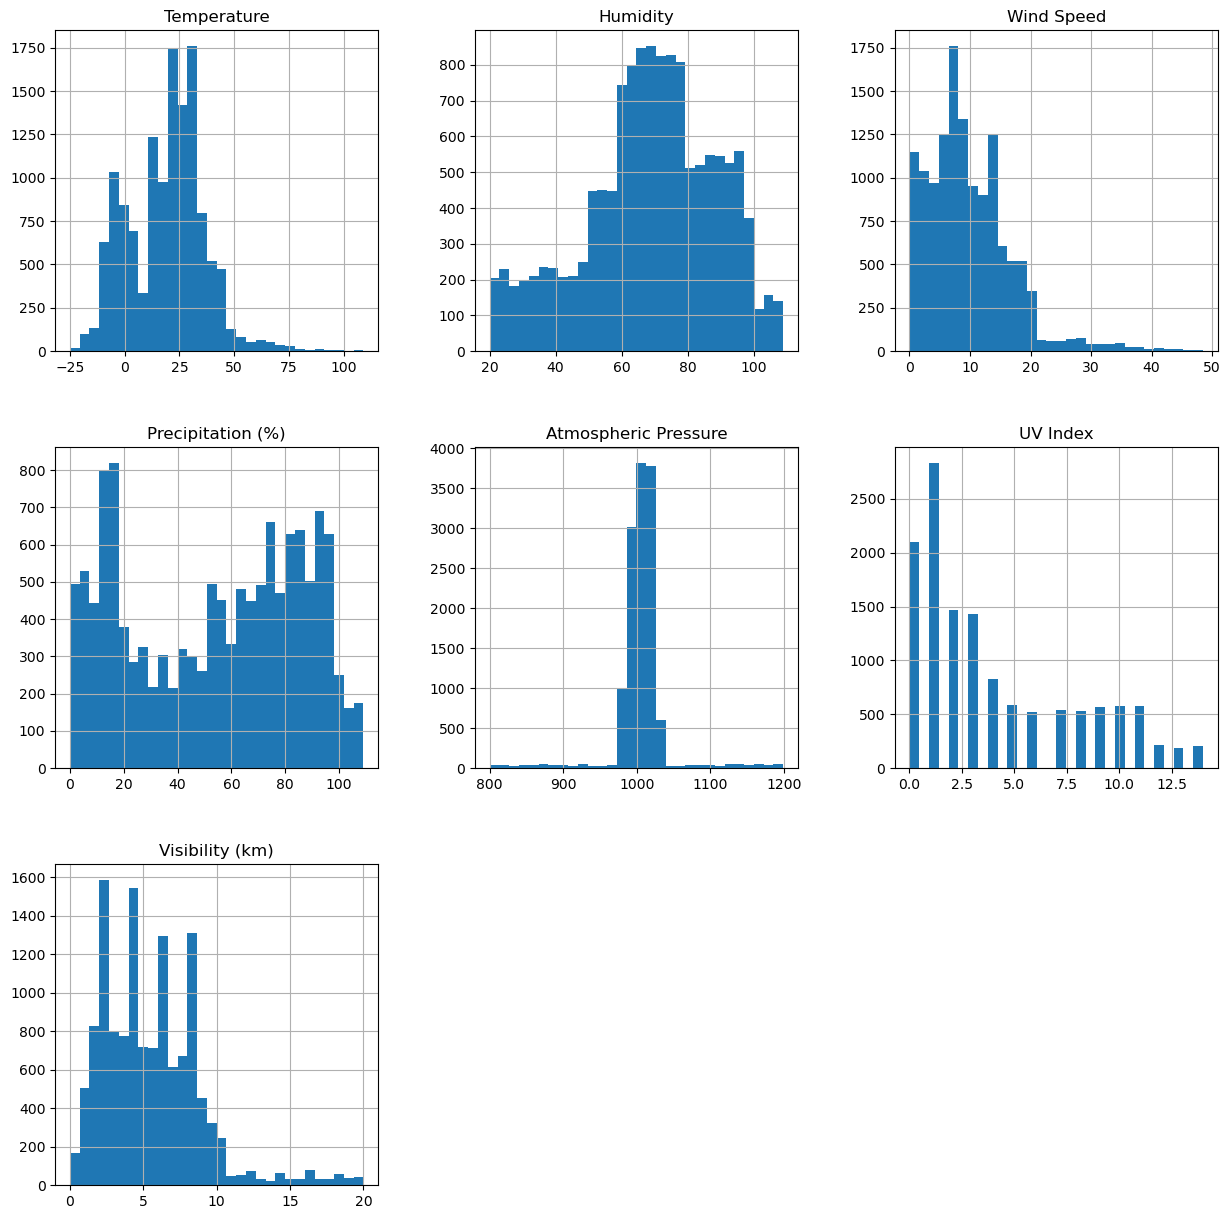

In [16]:
df.hist(bins=30, figsize=(15,15))

In [50]:
df['Season']=le.fit_transform(df[['Season']])
df['Location']=le.fit_transform(df[['Location']])
df['Cloud Cover']=le.fit_transform(df[['Cloud Cover']])
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location']]
y = df['Weather Type']

<Axes: >

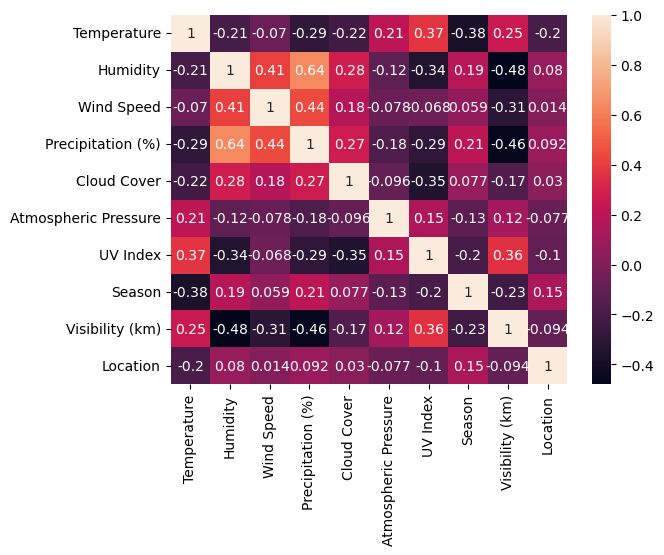

In [52]:
sns.heatmap(X.corr(),annot=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model1 = LogisticRegression()
model1.fit(X_train,y_train)
print('score of train model',model1.score(X_train,y_train))
print('score of test model',model1.score(X_test,y_test))
y_predict = model1.predict(X_test)
cm = confusion_matrix(y_test,y_predict)


score of train model 0.8448051948051948
score of test model 0.8494949494949495


In [87]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
print('score of train model',model2.score(X_train,y_train))
print('score of test model',model2.score(X_test,y_test))
y_predict = model2.predict(X_test)
cm = confusion_matrix(y_test,y_predict)


score of train model 1.0
score of test model 0.9073232323232323


In [89]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
print('score of train model',model3.score(X_train,y_train))
print('score of test model',model3.score(X_test,y_test))
y_predict = model3.predict(X_test)
cm = confusion_matrix(y_test,y_predict)



score of train model 0.9234848484848485
score of test model 0.88510101010101


In [90]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
print('score of train model',model4.score(X_train,y_train))
print('score of test model',model4.score(X_test,y_test))
y_predict = model4.predict(X_test)
cm = confusion_matrix(y_test,y_predict)


score of train model 1.0
score of test model 0.9204545454545454


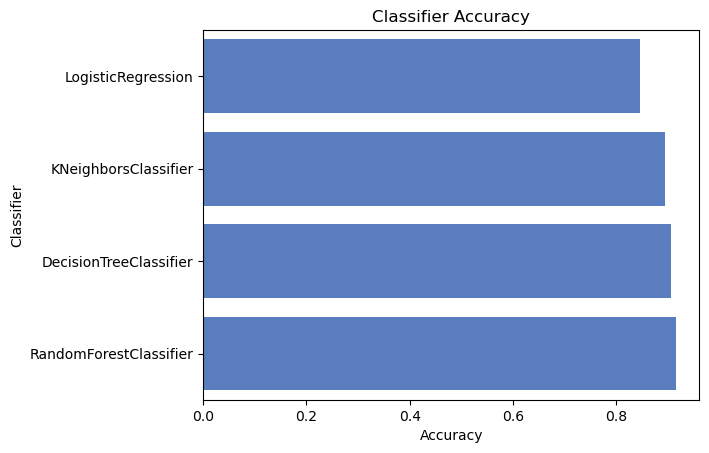

In [83]:
classifiers =["LogisticRegression", "DecisionTreeClassifier", "KNeighborsClassifier", "RandomForestClassifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [model1.score(X_test,y_test), model2.score(X_test,y_test), model3.score(X_test,y_test), model4.score(X_test,y_test)]
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");